<a href="https://colab.research.google.com/github/petrucior/verilog/blob/main/verilog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aulas de Verilog
---------------

Author: Petrúcio Medeiros

In [ ]:
# biblioteca e plugin para verilog
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin
!chmod a+x -R /content/nvcc4jupyter/verilog/

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-o18zqq5j
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-o18zqq5j
fatal: destination path 'nvcc4jupyter' already exists and is not an empty directory.
The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


# Estrutura básica do verilog
---

```verilog
module nome_modulo( lista_portas );
      // Declaração de portas

      // Variáveis intermediárias

      // Funcionamento do circuito
endmodule
```

- Inicia com `module` e encerra com `endmodule`
- Case-sensitive
- Todas as palavras chaves são minúsculas
- Espaços em branco não são interpretados
- Todos os comandos terminam em ponto-e-vírgula
- Comentário em uma única linha: //
- Comentário em múltiplas linhas: /* */

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      ( ... )
endmodule
```

<img align="center" width="300" height="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Halfadder.gif/1280px-Halfadder.gif">


## Declaração de portas
---

- Portas são usadas para comunicação do módulo com o mundo exterior

  - **input** -> entrada;

  - **output** -> saída;

  - **inout** -> bidirecional (entrada/saída);

- Declaração de portas simples (1 bit):
```
<tipo_da_porta> nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      input a, b; // Declarando a e b como entradas de 1 bit
      output s, cout; // Declarando s e cout como saidas de 1 bit
endmodule
```

- Declaração de barramentos (conjunto de bits):
```
<tipo_da_porta> [MSB:LSB] nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, cin, s, cout );
      input [3:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [3:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

- Definição de constantes (`parameter`)
  - São valores que permanecem constantes em todo o módulo, não podendo ter seus valores alterados
  - O uso de constantes pode tornar o código mais legível e mais fácil de atualizações
    - Obs.: A declaração de uma constante pode ser feita a qualquer momento no código verilog

- Declaração de constante:
```
parameter nome = valor;
```

Exemplo:
```verilog
module adder( a, b, cin, s, cout );
      parameter largura = 4;
      input [largura - 1:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [largura - 1:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

## Variáveis intermediárias
---

- São variáveis internas ao módulo
  - Tipo fio (Net Data Type): Representam uma conexão física (fio) interno ao módulo
  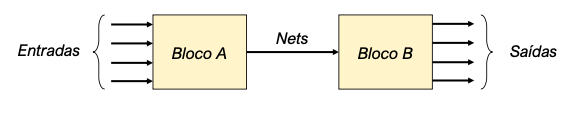
  
  - Registradores (Variable Data Type): Representam um armazenamento local (registrador) 
  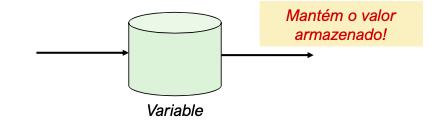


**Tipos de fios (Net Data Type)**
- Não apresentam capacidade de armazenamento

|`        Tipo                         `|`            Definição            `|
|:-------:|:-----------------------------------:|
|   wire  | Representa uma conexao (fio fisico) |
|   tri   |   Representa uma conexao tri-state  |
| supply0 |          Nivel logico BAIXO         |
| supply1 |          Nivel logico ALTO          |


Exemplo:
```verilog
wire ligacao;
wire [7:0] soma;
tri barramento; //permite três possíveis estados na saída do circuito: Nível lógico Alto, Nível lógico Baixo e Alta-impedância( Hi-Z)
```
Obs.: A declaração de Nets com mais de um bit é feita da mesma forma dos ports.

**Registrador (Variable Data Type)** 
- Apresentam capacidade de armazenamento
- Mais comum: tipo `reg`
  - Não podem ser utilizados para ligação da saída de um bloco para entrada de outro (deve-se utilizar `wire`)
  - Podem ter seus valores mudados apenas por um procedimento (`always`)

|`        Tipo                         `|`            Definição            `|
|:------------------:|:-------------------------------:|
|         reg        |         Valor sem sinal         |
|     reg signed     |         Valor com sinal         |
|       integer      |   Inteiro com sinal de 32-bits  |
| real,time,realtime | Nao sintetizáveis pelo Hardware |

Exemplo:
```verilog
reg [7:0] resultado;
integer count;
```
Obs.: A declaração de Register com mais de um bit é feita da mesma forma dos ports.

Regras de entrada/saída:

|` Tipo de Variavel      `|`      Entrada      `|`      Saida     `|`      IN/OUT `|
|:----------------:|---------|-------|--------|
|        reg       | NAO     | SIM   | NAO    |
|       wire       | SIM     | SIM   | SIM    |

## Funcionamento do circuito
---

- Descreve como o circuito funciona


- Abordagens:

  - **Estrutural**: Descreve o circuito em termos das portas lógicas, blocos e suas interconexões;
  - **Fluxo de Dados (RTL)**: Descreve o circuito em termos de expressões (lógicas e aritméticas) que relacionam entradas e saídas;
  - **Hierárquica**: Descreve o circuito pela associação de blocos previamente definidos, permitindo a construção de um sistema maior; 
  - **Comportamental**: Descreve o circuito em termos do seu comportamento (algoritmo);

### Descrição estrutural

- Descreve o circuito em termos das portas lógicas, blocos e suas interconexões
- Para isso, utiliza primitivas para construir o comportamento do circuito
- Blocos elementares (primitivas) -> **portas lógicas**

|    **Tipo de Primitivas**    	|    **Primitivas Existentes**    	|
|:----------------------------:	|:-------------------------------:	|
|     Portas multientradas     	|  and, or, nand, nor, xor e xnor 	|
| Portas com uma unica entrada 	|            not e buf            	|
|       Portas tri-state       	| bufif0, bufif1, notif0 e notif1 	|

- Para fazer um circuito usando as primitivas, basta referenciar a porta lógica e indicar as ligações.
  ```
  <primitiva> nome (ligação);
  ```
 
 - `primitiva`: and, or, nand, nor, xor, xnor, not, buf, bufif0, bufif1, notif0 ou notif1;
 - `nome`: Recomendável, mas não obrigatório;
 - `ligação`: como os pinos da primitiva estão ligados, separados entre virgulas
    - Primeiro item é sempre saída
    - Os itens seguintes são as entradas

Exemplos:
```verilog
/*
  Porta lógica: and
  Saída: x
  Entradas: a e b
  Nome: u0
*/
and u0 (x, a, b);
```

```verilog
/*
  Porta lógica: not
  Saída: y
  Entradas: x
  Nome: u1
*/
not u1 (y, x);
```

**Construir o circuito utilizando abordagem estrutural é só:**
- Referenciar as primitivas adequadas;
- Realizar as ligações entre elas.
Obs.: Para ligar a saída de uma primitiva para entrada de outra, deve-se declarar um fio intermediário (`wire`).

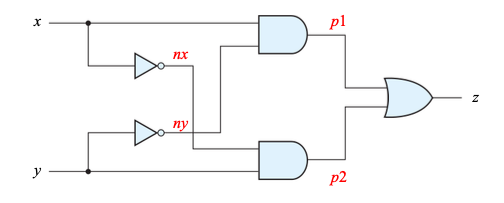

|` 	       x 	       `|` 	       y 	       `|` 	       nx 	       `|` 	       ny 	       `|` 	       p1 	       `|` 	       p2 	       `|` 	       z 	       `|
|-----------	|-------	|------------	|--------	|--------	|--------	|-------	|
| 0         	| 0     	| 1          	| 1      	| 0      	| 0      	| 0     	|
| 0         	| 1     	| 1          	| 0      	| 0      	| 1      	| 1     	|
| 1         	| 0     	| 0          	| 1      	| 1      	| 0      	| 1     	|
| 1         	| 1     	| 0          	| 0      	| 0      	| 0      	| 0     	|


Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule
```

#### Simulação: Descrição estrutural



In [ ]:
%%verilog

/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 4; // 2^{entradas} = 2^{2} = 4
reg [1:0] counter; // Criando um registro de 2 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[1],counter[0],z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("xy | z"); // printf apenas com string
		$monitor("%2b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

xy | z
00 | 0
01 | 1
10 | 1
11 | 0



#### Exercício 

Descrever o circuito usando a descrição estrutural.

| A 	| B 	| C 	| Z 	|
|---	|---	|---	|---	|
| 0 	| 0 	| 0 	| 1 	|
| 0 	| 0 	| 1 	| 1 	|
| 0 	| 1 	| 0 	| 1 	|
| 0 	| 1 	| 1 	| 1 	|
| 1 	| 0 	| 0 	| 1 	|
| 1 	| 0 	| 1 	| 1 	|
| 1 	| 1 	| 0 	| 1 	|
| 1 	| 1 	| 1 	| 1 	|

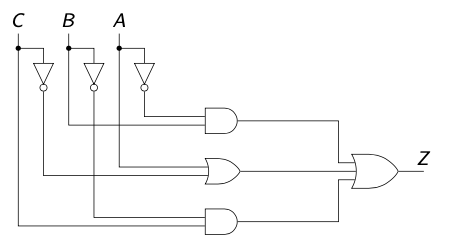

In [ ]:
%%verilog

/*

Módulo exercicio

*/
module exercicio( a, b, c, z );
  // Declaração de portas
  input a, b, c;
  output z; 

  // Variáveis (fios) intermediárias
  wire na, nb, nc, fand0, for0, fand1;

  // Estrutura
  not nota (na, a);
  not notb (nb, b);
  not notc (nc, c);

  and and0 (fand0, na, b);
  or or0 (for0, nc, a);
  and and1 (fand1, nb, c);

  or or1 (z, fand0, for0, fand1);

endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 8; // 2^{entradas} = 2^{3} = 8
reg [2:0] counter; // Criando um registro de 3 bits para entradas
wire z; // Declarando um fio de saída do "exercicio"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	exercicio a(counter[2],counter[1],counter[0],z); // Executando "exercicio"
	initial begin // // Início do bloco de comandos
		$display("abc | z"); // printf apenas com string
		$monitor("%3b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

abc | z
000 | 1
001 | 1
010 | 1
011 | 1
100 | 1
101 | 1
110 | 1
111 | 1



### Descrição por fluxo de dados

- Descreve o circuito em termos de expressões (lógicas e aritméticas) que relacionam entradas e saídas;
- Para isso, utiliza a diretiva -> **assign**

  ```
  assign <saída ou net> = (constante/segmento de vetor/expressão);
  ```
  Obs.: Não utilizar o **assign** para mudar valores de variáveis do tipo **reg**.

- **Declaração de constantes:**

  ```
  <tamanho>’<base><valor>
  ```
 
 - `tamanho`: quantidade de bits
 - `base`:
    - d ou D: Decimal
    - h ou H: Hexadecimal
    - b ou B: Binário
    - o ou O: Octal

  Exemplos:
  ```verilog
  /*
    Atribuição de constantes
  */
  assign x = 16’d255; // Decimal de 16 bits com valor 255
  assign y = 8’hA0;   // Hexadecimal de 8 bits com valor A0
  assign z = 4’b1001; // Binário de 4 bits com valor 1001
  assign w = 6’o12;   // Octal de 6 bits com valor 12
  ```
  Observações: 
  - Quando não explicitado o tamanho e o tipo, considere um valor do tipo **decimal** de **32 bits**
  ```verilog
  assign v = 12;      // Decimal de 32 bits com valor 12
  ```
  - Representação de valores negativos (em complemento de 2) adicionamos um sinal de menos **antes da especificação**.
  ```verilog
  assign j = -8’d12;  // Decimal negativo de 8 bits (complemento de 2)
  ```


  - Caracteres especiais:
    - Underline (_): usado para melhorar a legibilidade
  ```verilog
  assign x = 8’b1001_0011; // Binário de 8 bits com valor 10010011
  ```
    - X ou x: usado para valores desconhecidos
  ```verilog
  assign y = 8’hAx;        // 4 bits menos significativos desconhecidos
  ```
    - z ou Z: Alta impedância
  ```verilog
  assign z = 1’oZ;         // 1 bit em alta impedância
  ```

- **Declaração de um segmento de vetor:**

  Vetor **x** com tamanho **(inicio-fim)+1**:
  ```
  assign x = y[inicio:fim];
  ```

  Exemplos:
  ```verilog
  /*
    Atribuição de constantes
  */
  assign x = y[5:2];
  assign z = y[1:0];
  ```

- **Declaração de expressões:**

Operadores Lógicos:
  
  1. Bit-wise: aplicados bit-a-bit dos operandos

| Operador 	| Operação Realizada 	| Exemplo:<br>a = 4’b1010<br>b = 4’b0011 	|
|:--------:	|:------------------:	|:---------------------------------------:	|
|     ~    	|         NOT        	|               ~a = 4’b0101              	|
|     &    	|         AND        	|             a & b = 4’b0010             	|
|    \|    	|         OR         	|             a \| b = 4’b1011            	|
|     ^    	|         XOR        	|             a ^ b = 4’b1001             	|
| ~^ ou ^ ~ 	|        XNOR        	|             a ~^ b = 4’b0110            	| 


Exemplos:
  ```verilog
  assign x = ~a;        // O operador NOT tem apenas um operando
  assign y = a & b;     // AND
  assign z = a | b;     // OR
  assign q = a & b & c; // AND
  assign w = a ^ b;     // XOR
  assign e = a ^ b ^c;  // XOR
  assign r = a ~^ b;    // XNOR
  ```
Observações: 
- Os operadores Bit-wise valem mesmo que os operandos
tenham apenas um bit
- A quantidade de bits da saída de um operador Bit-wise é
igual a quantidade de bits do operando mais longo (há preenchimento com zeros)


  2. Redução: Possuem apenas um operando e reduzem um vetor a um único bit. Além disso, a operação é feita com os bits do operando

|   Operador  |   Operação Realizada  |   Exemplo:  a = 4’b1010  |
|:-----------:|:---------------------:|:------------------------:|
|       &     |           AND         |         &a = 1’b0        |
|      ~&     |          NAND         |         ~a = 1’b1        |
|      \|     |           OR          |         \|a = 1’b1       |
|      ~\|    |           NOR         |        ~\|a = 1’b0       |
|       ^     |           XOR         |         ^a = 1’b0        |
|  ~^ ou ^ ~ |          XNOR         |         ~^a = 1’b1       |

Exemplos:
  ```verilog
  assign x = &a;  // AND
  assign y = ~&a; // NAND
  assign z = |a;  // OR
  assign q = ~|a; // NOR
  assign w = ^a;  // XOR
  assign e = ~^a; // XNOR
  ```

  3. Lógicos: Resultam em um único bit, independente da quantidade de bits das entradas;
    - Entrada diferente de zero -> 1
    - Entrada igual a zero -> 0

| Operador 	| Operação Realizada 	| Exemplo: <br> a = 3’b101 <br> b = 3’b000 	|
|:--------:	|:------------------:	|:------------------------------:	|
|     !    	|         NOT        	|       !a = 1’b0 <br> !b = 1’b1      	|
|    &&    	|         AND        	|          a && b = 1’b0         	|
|   \|\|   	|         OR         	|         a \|\| b = 1’b1        	|
  
Exemplos:
  ```verilog
  assign x = a && b;
  assign y = a || b;
  assign z = !a;
  ```


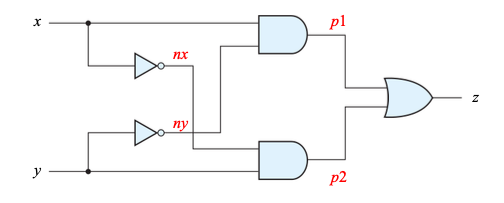

|` 	       x 	       `|` 	       y 	       `|` 	       nx 	       `|` 	       ny 	       `|` 	       p1 	       `|` 	       p2 	       `|` 	       z 	       `|
|-----------	|-------	|------------	|--------	|--------	|--------	|-------	|
| 0         	| 0     	| 1          	| 1      	| 0      	| 0      	| 0     	|
| 0         	| 1     	| 1          	| 0      	| 0      	| 1      	| 1     	|
| 1         	| 0     	| 0          	| 1      	| 1      	| 0      	| 1     	|
| 1         	| 1     	| 0          	| 0      	| 0      	| 0      	| 0     	|


Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Fluxo de dados
  assign ( x & ~y ) | ( y & ~x );
endmodule
```

Operadores Aritméticos

| Operador 	| Operação Realizada 	| Exemplo: <br>a = 11 <br>b= 5 	|
|:--------:	|:------------------:	|:----------------------------:	|
|     +    	|        Soma        	|          a + b = 16          	|
|     -    	|      Subtração     	|             a – b = 6            	|
|     *    	|    Multiplicação   	|           a * b = 55           	|
|     /    	|       Divisão      	|            a / b = 2           	|
|     %    	|  Resto da divisão  	|            a % b = 1           	|

Exemplos:
```verilog
assign x = a + b; 
assign y = a - b; 
assign w = a * b; 
assign z = a / b;
```

![full-subtract](https://www.electronicshub.org/wp-content/uploads/2015/06/4-bit-Subtractor.jpg)

Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, d );
  // Declaração de portas
  input [3:0] a, b; // Entradas
  output [3:0] d;   // Saída

  // Fluxo de dados
  assign d = (a - b);
endmodule
```

Operadores Deslocamento
  - Operam sobre vetores
  - Os bits deslocados são perdidos, e as posições anteriores destes bits são preenchidas com zeros;

| Operador 	|    Operação Realizada   	| Exemplo:<br>a = 4’b0110 	|
|:--------:	|:-----------------------:	|:------------------------:	|
|    <<    	| Deslocamento à esquerda 	|      a<<1 = 4’b1100      	|
|    >>    	|  Deslocamento à direita 	|      a>>1 = 4’b0011      	|

Exemplos:
```verilog
assign x = a << 1;
assign y = a >> 1;
```

Operadores de Concatenação e Replicação
  - Junta os operandos e forma um novo vetor

| Operador 	| Operação Realizada 	| Exemplo: <br>a = 3’b011 <br>b = 2’b01 	|
|:--------:	|:------------------:	|:-------------------------------------:	|
|    {}    	|    Concatenação    	|            {a,b} = 5’b01101           	|
|   {{ }}  	|     Replicação     	|           {3{b}} = 6’b010101          	|

Exemplos:
```verilog
assign x = {a, b}; 
assign y = {2{a}};
```

Operadores Relacionais
  - São usados para comparar dois operandos;
  - Resultado é zero (0) quando a comparação é falsa e um (1) caso contrário


| Operador 	| Operação Realizada 	| Exemplo: <br>a = 4’b0110 <br>b = 4’b0011 <br>c = 4’b0011 	|
|:--------:	|:------------------:	|:--------------------------------------------------------:	|
|     >    	|      Maior que     	|                       a > b = 1’b1                       	|
|     <    	|      Menor que     	|                       a < b = 1’b0                       	|
|    ==    	|       Igual a      	|                       a == b = 1’b0                      	|
|    >=    	| Maior ou igual que 	|              a >= b = 1’b1 <br>a >= c = 1’b1             	|
|    <=    	| Menor ou igual que 	|                       a <= b = 1’b0                      	|
|    !=    	|      Diferente     	|                       a != b = 1’b1                      	|

Exemplos:
```verilog
assign x = a != b; // Avaliando se a e b são diferentes
assign y = a >= b; // Avaliando se a é maior que b
```

![xnor](https://www.electronics-tutorial.net/wp-content/uploads/2015/08/XNOR1.png)


Exemplo:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, y );
  // Declaração de portas
  input a, b; // Entradas
  output y;   // Saída

  // Fluxo de dados
  assign y = (a == b);
endmodule
```

- **Atribuição Condicional:**

  Corresponde a um ternário em C
  ```verilog
  assign x = (condição) ? (verdadeiro) : (falso);
  ```

  Exemplo:
  ```verilog
  /*
    verifica c
    se c = 1 (verdadeiro), então x = 4’b0010
    se c = 0 (falso), então x = 4’b1100
  */
  assign x = c ? 4’b0010 : 4’b1100;
  ```

![mux](https://www.researchgate.net/publication/340612297/figure/fig14/AS:962178924441600@1606412740008/a-Multiplexer-schematic-structure-b-truth-table-of-the-mux-based-on-inputs-c-truth.png)


Exemplo:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, s, out );
  // Declaração de portas
  input a, b, s; // Entradas
  output out;   // Saída

  // Fluxo de dados
  assign out = s ? a : b;
endmodule
```

#### Simulação: operações lógicas

In [ ]:
%%verilog

/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Fluxo de dados
  assign z = ( x & ~y ) | ( y & ~x );
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 4; // 2^{entradas} = 2^{2} = 4
reg [1:0] counter; // Criando um registro de 2 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[1],counter[0],z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("xy | z"); // printf apenas com string
		$monitor("%2b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

xy | z
00 | 0
01 | 1
10 | 1
11 | 0



#### Exercício
Descreva o circuito correspondente a um somador completo (Full-Adder) em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores lógicos.

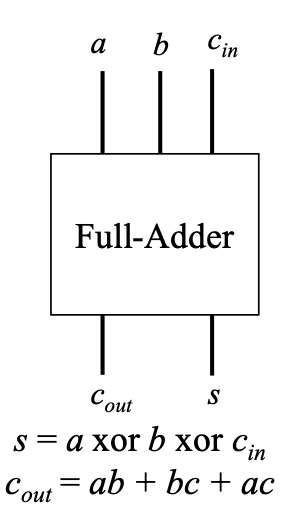


In [ ]:
%%verilog

/*

Módulo exercicio

*/
module exercicio( /* Adicione seu código aqui */ );
  
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 8; // 2^{entradas} = 2^{3} = 8
reg [2:0] counter; // Criando um registro de 3 bits para entradas
wire z, w; // Declarando um fio de saída do "exercicio"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	exercicio a(counter[2],counter[1],counter[0], z, w); // Executando "exercicio"
	initial begin // // Início do bloco de comandos
		$display("abc | s cout"); // printf apenas com string
		$monitor("%3b | %1b   %1b", counter, z, w); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

#### Simulação: operador aritmético

In [ ]:
%%verilog

/*

Módulo circuito

*/
module circuito( a, b, d );
  // Declaração de portas
  input [3:0] a, b; // Entradas
  output [3:0] d;   // Saída

  // Fluxo de dados
  assign d = (a - b);
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 256; // 2^{numero_bits_entradas} = 2^{8} = 256
reg [7:0] counter; // Criando um registro de 8 bits para entradas
wire [3:0] z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[7:4], counter[3:0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
    $display("b3210 a3210 | z3210"); // printf apenas com string
    $monitor(" %4b  %4b |  %4b", counter[7:4], counter[3:0], z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

b3210 a3210 | z3210
 0000  0000 |  0000
 0000  0001 |  1111
 0000  0010 |  1110
 0000  0011 |  1101
 0000  0100 |  1100
 0000  0101 |  1011
 0000  0110 |  1010
 0000  0111 |  1001
 0000  1000 |  1000
 0000  1001 |  0111
 0000  1010 |  0110
 0000  1011 |  0101
 0000  1100 |  0100
 0000  1101 |  0011
 0000  1110 |  0010
 0000  1111 |  0001
 0001  0000 |  0001
 0001  0001 |  0000
 0001  0010 |  1111
 0001  0011 |  1110
 0001  0100 |  1101
 0001  0101 |  1100
 0001  0110 |  1011
 0001  0111 |  1010
 0001  1000 |  1001
 0001  1001 |  1000
 0001  1010 |  0111
 0001  1011 |  0110
 0001  1100 |  0101
 0001  1101 |  0100
 0001  1110 |  0011
 0001  1111 |  0010
 0010  0000 |  0010
 0010  0001 |  0001
 0010  0010 |  0000
 0010  0011 |  1111
 0010  0100 |  1110
 0010  0101 |  1101
 0010  0110 |  1100
 0010  0111 |  1011
 0010  1000 |  1010
 0010  1001 |  1001
 0010  1010 |  1000
 0010  1011 |  0111
 0010  1100 |  0110
 0010  1101 |  0101
 0010  1110 |  0100
 0010  1111 |  0011
 0011  0000 |  0011


#### Exercício
Descreva o circuito correspondente a um somador de 4-bits em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores aritméticos.

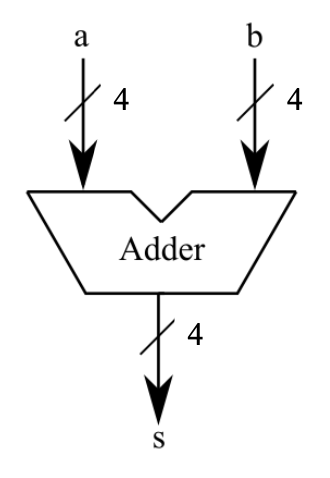

In [ ]:
%%verilog

/*

Módulo circuito

*/
module exercicio( /* Adicione seu código aqui */ );
  
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Operador aritmético
  /*
    Adicione seu código aqui
  */

endmodule

/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 256; // 2^{numero_bits_entradas} = 2^{8} = 256
reg [7:0] counter; // Criando um registro de 8 bits para entradas
wire [3:0] z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	exercicio a(counter[7:4], counter[3:0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
    $display("b3210 a3210 | s3210"); // printf apenas com string
    $monitor(" %4b  %4b |  %4b", counter[7:4], counter[3:0], z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

/tmp/tmpi839fuqs/d552ab86-b12d-44b7-96ec-315779eb31e9.v:31: error: Wrong number of ports. Expecting 0, got 3.
1 error(s) during elaboration.



#### Simulação: operador relacional

In [ ]:
%%verilog

/*

Módulo circuito

*/
module circuito( a, b, y );
  // Declaração de portas
  input a, b; // Entradas
  output y;   // Saída

  // Fluxo de dados
  assign y = (a == b);
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 4; // 2^{entradas} = 2^{2} = 4
reg [1:0] counter; // Criando um registro de 2 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[1],counter[0],z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("xy | z"); // printf apenas com string
		$monitor("%2b | %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

xy | z
00 | 1
01 | 0
10 | 0
11 | 1



#### Exercício
Descreva o circuito correspondente a um comparador de magnitude de 4 bits em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores relacionais.

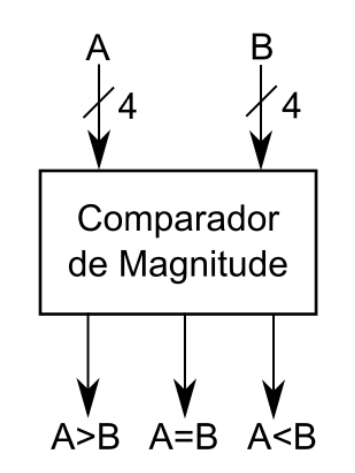


In [ ]:
%%verilog

/*

Módulo circuito

*/
module exercicio( /* Adicione seu código aqui */ );
  
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Operador relacional
  /*
    Adicione seu código aqui
  */

endmodule

/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 256; // 2^{numero_bits_entradas} = 2^{8} = 256
reg [7:0] counter; // Criando um registro de 8 bits para entradas
wire z1,z2,z3; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	exercicio a(counter[7:4], counter[3:0], z1, z2, z3); // Executando "circuito"
	initial begin // // Início do bloco de comandos
    $display("b3210 a3210 | A>B A=B A<B"); // printf apenas com string
    $monitor(" %4b  %4b |  %1b   %1b   %1b", counter[7:4], counter[3:0], z1, z2, z3); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

/tmp/tmpo8e6d3_d/163f6e8d-b362-41b6-898d-4d0df228f134.v:31: error: Wrong number of ports. Expecting 0, got 5.
1 error(s) during elaboration.



#### Simulação: atribuição condicional


In [ ]:
%%verilog

/*

Módulo circuito

*/
module circuito( a, b, s, out );
  // Declaração de portas
  input a, b, s; // Entradas
  output out;   // Saída

  // Fluxo de dados
  assign out = s ? a : b;
endmodule


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 8; // 2^{entradas} = 2^{3} = 8
reg [2:0] counter; // Criando um registro de 2 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[2], counter[1], counter[0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("abs | out"); // printf apenas com string
		$monitor("%3b |  %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

abs | out
000 |  0
001 |  0
010 |  1
011 |  0
100 |  0
101 |  1
110 |  1
111 |  1



#### Exercício
Descreva o circuito correspondente a um multiplexador 2x1 em Verilog utilizando a abordagem por fluxo de dados e utilizando atribuição condicional.

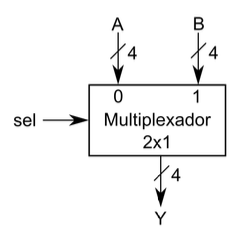

In [ ]:
%%verilog

/*

Módulo circuito

*/
module exercicio( /* Adicione seu código aqui */ );
  
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Operador relacional
  /*
    Adicione seu código aqui
  */

endmodule

/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 512; // 2^{numero_bits_entradas} = 2^{9} = 256
reg [8:0] counter; // Criando um registro de 9 bits para entradas
wire [3:0] z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades de entradas
	exercicio a(counter[8:5], counter[4:1], counter[0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
    $display("a3210 b3210 s | Y3210"); // printf apenas com string
    $monitor(" %4b  %4b  %1b  | %4b", counter[8:5], counter[4:1], counter[0], z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

/tmp/tmpngh97xwg/f2a88891-4722-414c-96b6-d2604917b089.v:31: error: Wrong number of ports. Expecting 0, got 4.
1 error(s) during elaboration.



### Descrição por hierarquia

- Descreve o circuito pela associação de blocos previamente definidos, permitindo a construção de um sistema maior;
- Para isso, usa blocos já definidos pelo usuário, que devem ser instanciados (referenciados);

  Declaração:
  ```
  <nome_modulo> nome( mapeamento )
  ```
 
 - `nome_modulo`: Nome do módulo a ser referenciado
 - `nome`: nome da instância específica do módulo
 - `mapeamento`: forma que as entradas e saídas estão ligadas
    - lista:
      - As entradas/saídas devem ser colocadas na ordem que foram declaradas
      Exemplo:
      ```
      half_adder ha1( a1, b1, s1, c1 );
      ```
    - Nome:
      - As entradas/saídas são associadas a pinos específicos do módulo
      Exemplo:
      ```
      half_adder ha1( .a(a1), .b(b1), .s(s1), .cout(c1) );
      ```

  Observações:
    - Usa o **wire** de forma similiar à descrição estrutural
    - Os módulos devem estar:
      - No projeto do módulo principal
      - No arquivo do módulo principal


![ands](http://www.edwardbosworth.com/My5155Text_V07_HTM/MyText5155_Ch04_V07_files/image051.gif)

```verilog
// Descrevendo uma porta and
module and2x1 (x, y, z);
  // Declaração de portas
  input x, y;
  output z;

  // Descrição por fluxo de dados
  assign z = x & y;
endmodule


module circuito (a, b, c, d, abcd);
  // Declaração de portas
  input a, b, c, d;
  output abcd;

  // Variáveis (fios) intermediárias
  wire ab, cd;

  // Descrição por hierarquia
  and2x1 a1 (a, b, ab);
  and2x1 a2 (c, d, cd);
  and2x1 a3 (ab, cd, abcd);
endmodule
```

#### Simulação: descrição por hierarquia

In [ ]:
%%verilog

/*

Módulo circuito

*/

// -------------------------------
// Criando módulo simples
// -------------------------------
module and2x1 (x, y, z);
  // Declaração de portas
  input x, y;
  output z;

  // Descrição estrutural
  and and1 (z, x, y);
endmodule

// -------------------------------
// Reutilizar módulo construído
// -------------------------------
module circuito (a, b, c, d, abcd);
  // Declaração de portas
  input a, b, c, d;
  output abcd;

  // Variáveis (fios) intermediárias
  wire ab, cd;

  // Descrição por hierarquia
  and2x1 and1 (a, b, ab);
  and2x1 and2 (.x(c), .y(d), .z(cd));  //and2x1 and2 (c, d, cd);
  and2x1 and3 (ab, cd, abcd);
endmodule                                                               


/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores
parameter nbits = 16; // 2^{entradas} = 2^{4} = 16
reg [3:0] counter; // Criando um registro de 16 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades
	circuito t(counter[3], counter[2], counter[1], counter[0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
		$display("abcd | abcd"); // printf apenas com string
		$monitor("%4b |    %1b", counter, z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

abcd | abcd
0000 |    0
0001 |    0
0010 |    0
0011 |    0
0100 |    0
0101 |    0
0110 |    0
0111 |    0
1000 |    0
1001 |    0
1010 |    0
1011 |    0
1100 |    0
1101 |    0
1110 |    0
1111 |    1



#### Exercício

a. Descreva um multiplexador 2x1 em Verilog. Utilize a abordagem que julgar necessário.

b. Descreva o circuito correspondente a um multiplexador 4x1 em Verilog utilizando a abordagem por hierarquia a partir do multiplexador 2x1 projetado no item (a).

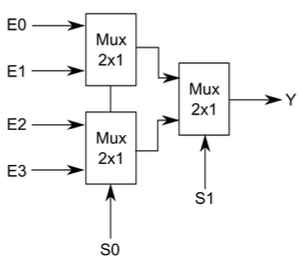

In [ ]:
%%verilog

/*

Módulo circuito

*/

// -------------------------------
// Módulo simples
// -------------------------------
module modulosimples( /* Adicione seu código aqui */  );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição da funcionalidade
  /*
    Adicione seu código aqui
  */
endmodule

module exercicio( /* Adicione seu código aqui */ );
  
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis intermediárias
  /*
    Adicione seu código aqui
  */

  // Descrição por hierarquia
  /*
    Adicione seu código aqui
  */

endmodule

/*

 Módulo de teste

*/
module teste(); // Definindo um módulo de teste, onde adiciono valores para variáveis de entrada
parameter nbits = 64; // 2^{numero_bits_entradas} = 2^{6} = 64
reg [5:0] counter; // Criando um registro de 6 bits para entradas
wire z; // Declarando um fio de saída do "circuito"
integer k; // Declarando um inteiro para percorrer todas as possibilidades de entradas
	exercicio a(counter[5],counter[4],counter[3],counter[2], counter[1], counter[0], z); // Executando "circuito"
	initial begin // // Início do bloco de comandos
    $display("e0123 s01 | Y"); // printf apenas com string
    $monitor(" %4b  %2b | %1b", counter[5:2], counter[1:0], z); // printf passando variáveis
    counter = 0;
    /*
    Percorre a quantidade de saídas e armazena no contador
    */
		for (k=1; k<nbits; k=k+1)
     #1 counter = k;
		$finish;
	end // Fim do bloco de comandos
endmodule

/tmp/tmpdzwa2dz3/1afb4f47-98e6-4334-8e3b-2c22fd37d9e2.v:52: error: Wrong number of ports. Expecting 0, got 7.
1 error(s) during elaboration.

